In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
data = pd.read_csv('Cust_Spend_Data.csv')
print(data.shape)
data.head()

(10, 7)


,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
features = data.iloc[:, 2:]
features

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [4]:
scaled_features = features.apply(zscore)
scaled_features.describe()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,0.000000,2.220446e-17,-6.661338e-17,4.440892e-17,0.000000
std,1.054093,1.054093e+00,1.054093e+00,1.054093e+00,1.054093
min,-1.410294,-1.240347e+00,-6.546537e-01,-7.414326e-01,-1.380131
25%,-0.860829,-6.201737e-01,-6.546537e-01,-7.414326e-01,-0.690066
50%,0.054947,-3.100868e-01,-6.546537e-01,-6.290944e-01,-0.172516
75%,0.741778,6.201737e-01,9.819805e-01,8.874724e-01,0.776324
max,1.886498,1.860521e+00,1.527525e+00,1.730009e+00,1.725164


In [5]:
scaled_features.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


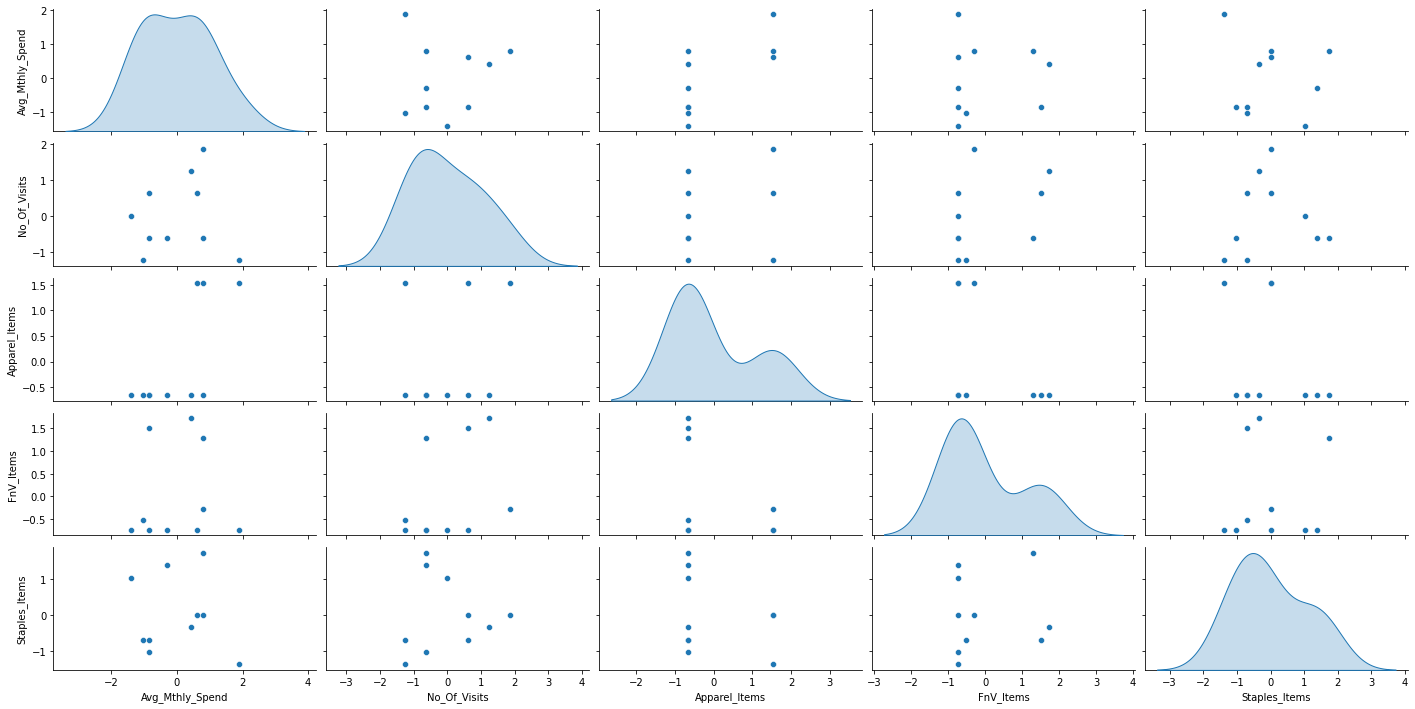

In [6]:
sns.pairplot(data=scaled_features, height=2, aspect=2, diag_kind='kde');

### **Agglomerative clustering**

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

In [9]:
model.fit(scaled_features)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [10]:
data['Labels'] = model.labels_
data.head(15)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Labels
0,1,A,10000,2,1,1,0,0
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,0
3,4,D,6500,5,1,1,4,0
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,2
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,2
8,9,I,2000,2,0,2,2,2
9,10,J,1000,4,0,1,7,2


In [13]:
Clusters = data.drop(columns='Cust_ID', axis=1).groupby('Labels').mean()
Clusters

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


### **Building the dendogram**

In [14]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist # Pairwise distribution between data points

In [15]:
# distance of the dendogram

Z = linkage(scaled_features, metric='euclidean', method='average')

In [16]:
# Comparing the distance of the dendograms 'Z' with the distance of the data points 'pdist'

c, coph_dists = cophenet(Z, pdist(scaled_features))

In [17]:
# Correlation between the distance of the dendograms 'Z' and the distance of the data points

c

0.8681149436293064

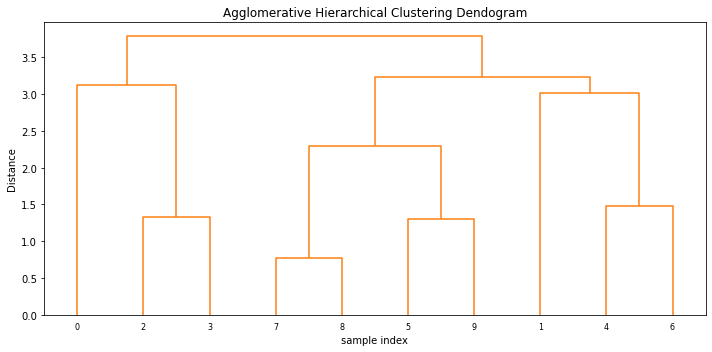

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [23]:
# Changing the hyperparameters

Z = linkage(scaled_features, metric='euclidean', method='complete')

In [24]:
c, coph_dists = cophenet(Z, pdist(scaled_features))

In [25]:
c

0.8606955190809153

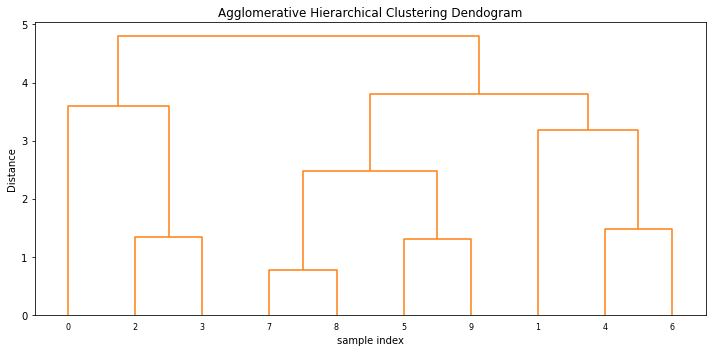

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [28]:
# Changing the hyperparameters

Z = linkage(scaled_features, metric='euclidean', method='ward')

In [29]:
c, coph_dists = cophenet(Z, pdist(scaled_features))

In [30]:
c

0.8453818941339526

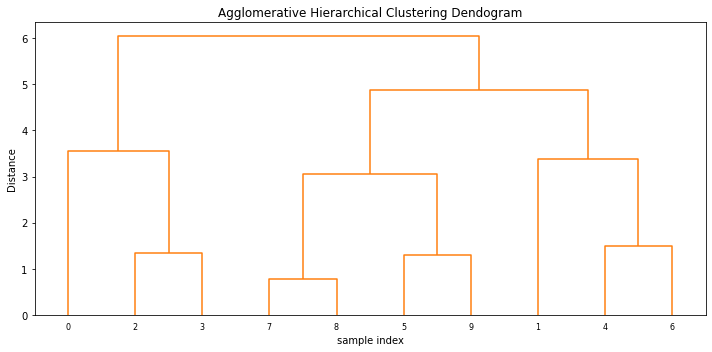

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [37]:
# Changing the hyperparameters

Z = linkage(scaled_features, metric='cosine', method='average')

In [38]:
c, coph_dists = cophenet(Z, pdist(scaled_features))

In [39]:
c

0.8239727019215298

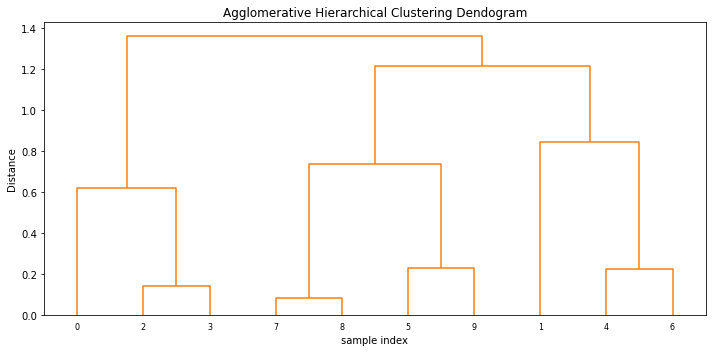

In [40]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()